[[-51.44353353 -40.26270644 195.96724507  62.37712308  31.6227766 ]]


Traceback (most recent call last):
  File "C:\Users\aizaw\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 196, in process
    func(*args, **kwargs)
  File "C:\Users\aizaw\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


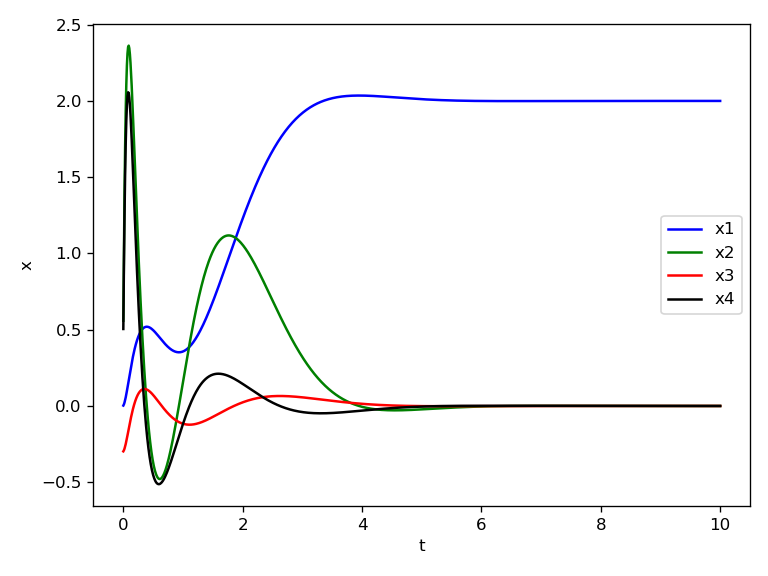

In [12]:
#%matplotlib notebook
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
#import math
#import time
import kal_python as kal


l_bar = 1.0  # length of bar
M = 1.0  # [kg]
m = 0.3  # [kg]
g = 9.8  # [m/s^2]

Q = np.diag([1, 0.01, 1.0, 0.01])
R = np.diag([0.01])
QQ = np.diag([1, 1, 1, 1,10])
RR = np.diag([0.01])
nx = 4
nu = 1   
T = 10  
dt = 0.01
g = 9.8

def get_model_matrix():

    # Model Parameter
    A = np.array([
        [0.0, 1.0, 0.0, 0.0],
        [0.0, 0.0, m * g / M, 0.0],
        [0.0, 0.0, 0.0, 1.0],
        [0.0, 0.0, g * (M + m) / (l_bar * M), 0.0]
    ])
    #A = np.eye(nx) + dt * A

    B = np.array([
        [0.0],
        [1.0 / M],
        [0.0],
        [1.0 / (l_bar * M)]
    ])
    #B = dt * B

    return A, B

A,B = get_model_matrix()
#C = np.eye(4)
C = np.array([1,0,0,0])
ss = kal.state_space(A,B,0,C)
#controller = kal.no_controller(0)
#controller = kal.LQR_controller(ss,Q,R)
controller = kal.servo_controller(ss,QQ,R,dt)


x0 = np.array([0,0,-0.3,0])

f = kal.inverted_pendulum_cart_function(M,m,l_bar,x0,x0)
sim = kal.simulator(T,dt,controller,f,x0,False)

sim.simulation()
fig = kal.t_x_plot(4,int(T/dt))
fig.show(sim.t_log,sim.x_log)




<IPython.core.display.Javascript object>


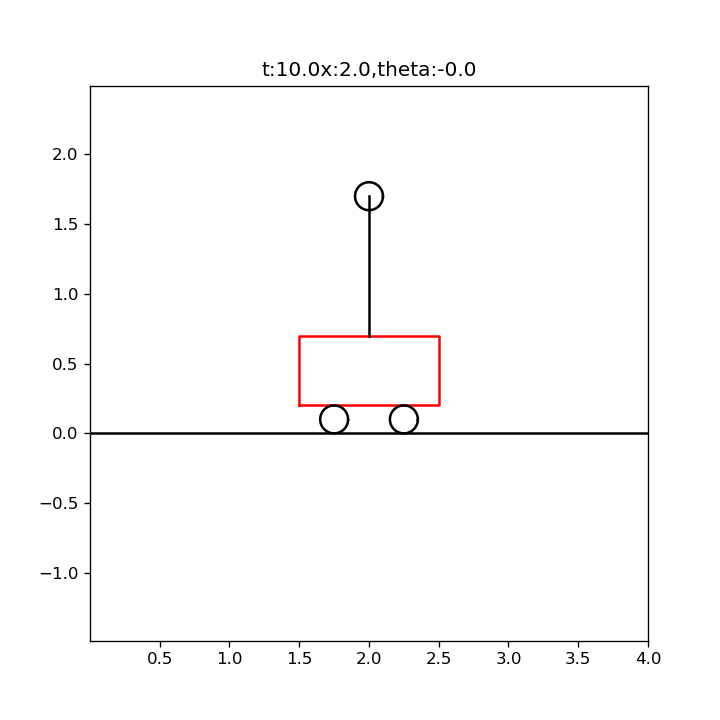

In [13]:
sim.draw()